# Jakolaskun jakojäännöksen laskeminen ja tiedon salaaminen
Draft 30.11.2021
Matti Heikkinen

## Sisällys
1 Johdanto
 
 1.1 Jakolaskun jakoyhtälö
 
 1.2 Kongruenssi
 
 1.3 Kongruenttien lukujen jakojäännökset
 
 1.4 Kongruenssin tärkeimmät ominaisuudet
 
2 Jakojäännöksen selvittäminen ohjelmoimalla
 
 2.1 Lineaarinen algoritmi
 
 2.2 Logaritminen algoritmi
 
3 Shorin kvanttialgoritmi
 
4 Tiedon salaaminen ja RSA-Algoritmi

## 1 Johdanto

Tässä artikkelissa tarkastellaan miten lukujen jaollisuutta ja jakojäännöstä voidaan hyödyntää tiedon salaamisessa. Kertaamme lukiomatematiikan lähtökodista mitä tarkoittavat lukuteorian käsitteet jakoyhtälö ja kongruenssi ja miten jakolaskun jakojäännös voidaan selvittää erilaisilla algoritmeilla. Tutustumme python -ohjelmointikielen avulla kahteen algoritmiin, joilla on erilainen tehokkuus ja aikavaatimus. Lisäksi esittelemme lyhyesti miten samanlaisia ongelmia voidaan ratkaista kvanttitietokoneissa suoritettavilla kvanttialgoritmeilla.

Luvussa 1 kerrataan lukiomatematiikasta tutut jakoyhtälön ja kongruenssin käsitteet [1], joita tarvitset luvussa 4, missä käsitellään tiedon salaamisen ja salatun tiedon avaamisen periaateitta RSA-algoritmin avulla. Luvussa 2 käsitellään erilaisia algoritmeja, joiden avulla voidaan tietokoneilla laskea suurten lukujen jakojäännöksiä,joihin tiedonsalauksessa käytettävät algoritmit perustuvat. Luvussa 3 esitellään lyhyesti Shorin algoritmi[4,5],jota voidaan käyttää kvanttitietokoneissa hyvin suurten lukujen jakolaskun jakojäännösten laskemisessa.Tiedon salaamisen periaate esitellään luvussa 4.


## 1.1 Jakolaskun jakoyhtälö

Esimerkiksi jakolaskun $13 : 3$  jakoyhtälö on $13 = 4\cdot 3 + 1$. Jakoyhtälö ilmaisee , että kun luku $13$ jaetaan luvulla $3$, niin jakolaskun osamäärä on 4 ja jakojäännös $1$. Saman jakolaskun jakojäännös ja jakaja voidaan ilmaista <strong><em>kongruenssi</em></strong>-käsitteen avulla seuraavasti: $13\equiv1\ \left(mod\ 4\right)$. Luvut $13$ ja $1$ ovat kongruentit modulo $4$. Eli kun luku $13$ jaetaan luvulla $4$, saadaan jakojäännökseksi $1$.

<strong>Jakolaskun jakoyhtälö</strong>

Jakolaskun $a:b$ tulos voidaan voidaan esittää yhtälönä

$\text{jaettava} = \text{osamäärä} \cdot \text{jakaja} + \text{jakojäännös}$, eli muodossa $a = q\cdot b +r$,

missä $a=$ jaettava, $b=$ jakaja, $q =$ quotient eli osamäärä ja $r =$ remainder eli jakojäännös $r<b$. Jakolaskun jakojäännös on siis aina pienempi kuin jakaja.

### Esimerkki 1

Alla on esitetty python ohjelmoinnin avulla selvitetty jakolaskun $276 : 13$ osamäärä ja jakojäännös. Pythonissa  "//"-operaattori tarkoittaa kokonaisjakoa eli osamäärään laskemista ja jakojäännös saadaan "%"-operaattorilla.

In [1]:
# esimerkki 1: jakolaskun 276: 13 osamäärä ja jakojäännös
# voit vaihdella jaettavaa ja jakajaa

#jaettava a
a = 276
#jakaja
b = 13
#osamäärä b
q = a // b
#jakojäännös q
r = a % b
print("Tutkitaan jakolaskua ", a, ":", b)
print("jakolaskun osamäärä: ", q)
print("jakojäännös: ", r)
print("jakolaskun tulos jakoyhtälönä: ", a,"=",q, "*",b,"+",r)

Tutkitaan jakolaskua  276 : 13
jakolaskun osamäärä:  21
jakojäännös:  3
jakolaskun tulos jakoyhtälönä:  276 = 21 * 13 + 3


Ylläolevan jakolaskun tulos voidaan esittää kongruenssina $276\equiv3\ \left(mod\ 13\right)$. On tärkeää huomata kongruenssin ominaisuus, että erotus $276-3=273= 21\cdot13$ on jaollinen luvulla $13$. Eli kongruenssin avulla ilmaistuna $276-3\equiv273\equiv0\ \left(mod\ 13\right)$.

## 1.2 Kongruenssi

Kerrataan vielä kongruenssin käsite, koska se on tärkeä jatkossa. Olkoon $n$ lukua yksi suurempi kokonaisluku. Kokonaisluvut $a$ ja $b$ ovat kongruentit modul $n$, jos niiden erotus jaollinen luvulla $n$.

Jos luvut a ja b ovat kongruentit modulo n, niin merkitään [1]

$a\equiv b\ \left(mod\ n\right)\ $

### Esimerkki 2:

$17\equiv 3\ \left(mod\ 7\right)$, koska $17-3\ =\ 14=2\cdot7$ ,eli luku 14 on jaollinen luvulla 7.


$-19\equiv5\ \left(mod\ 2\right)$, koska $-19-5=-24=\left(-12\right)\cdot2$, eli luku -24 on jaollinen luvulla 2.



In [12]:
# Esimerkki 2, laske tähän

# Asetetaan arvo jaettavalle a
a = 17

# jakaja b
b = 7

#osamäärä, quotient
q = a // b

# jakojäännös, remainder
r = a % b

print("Tutkitaan jakolaskua ", a, ":", b)
print("osamäärä:", q)
print("jakojäännös: ",r)
print("jakolaskun tulos jakoyhtälönä: ", a,"=",q, "*",b,"+",r)


Tutkitaan jakolaskua  17 : 7
osamäärä: 2
jakojäännös:  3
jakolaskun tulos jakoyhtälönä:  17 = 2 * 7 + 3


## 1.3 Kongruenttien lukujen jakojäännökset

Positiiviset luvut $a$ ja $b$ kongruentit modulo $n$, jos ja vain jos luvuilla $a$ ja $b$ on sama jakojäännös kun jaetaan luvulla $n$.

### Esimerkki 3: 
Lasketaan pythonilla ja osoitetaan, että luvuilla $365$ ja $295$ on samat jakojäännökset kun jaetaan luvulla $7$, eli tutkitaan seuraavia jakolaskuja:


In [13]:
# laske tähän soluun tehtävä 3
print("Jakolaskun 365: 7 jakojäännös: ", 365 % 7)
print("Jakolaskun 295: 7 jakojäännös: ", 295%7)

Jakolaskun 365: 7 jakojäännös:  1
Jakolaskun 295: 7 jakojäännös:  1


Jakolaskujen $365:7$ ja $295:7$ jakojäännökset voidaan ilmaista:

$365\equiv295\equiv1\ \left(mod\ 7\right)$


### Esimerkki 4: 
Osoita, että $71\equiv3\ \left(mod\ 4\right)$.

In [16]:
# laske tähän esimerkki 4:
print("Jakolaskun 71: 4 jakojäännös: ", 71 % 4)
print("Jakolaskun 3: 4 jakojäännös: ", 3%4)

Jakolaskun 71: 4 jakojäännös:  3
Jakolaskun 3: 4 jakojäännös:  3


Jakoyhtälöt
$71 = 17\cdot 4 + 3$ ja $3 = 0\cdot 4 + 3$

## 1.4 Kongruenssi tärkeimmät ominaisuudet 

Kun ryhdymme laskemaan suurempien lukujen jakolaskun jakojäännöstä hyödynnämme seuraavia kongruenssin ominaisuuksia [1].

### Kongruenttien lukujen summat ovat kongruentteja

$a+c\ \equiv b+d\ \left(mod\ n\right)$

### Kongruenttien lukujen tulot ovat kongruentteja

$ac\ \equiv bd\ \left(mod\ n\right)$

### Kongruenttien lukujen potenssit ovat kongruentteja

$a^k\equiv b^k\ \left(mod\ n\right)$

### Esimerkki 5
Määritä kongruenssia käyttäen jakojäännös, kun luku $242\cdot403+81^{23}$ jaetaan luvulla $5$.

Tarvittavat jakojäänökset:

Jakolaskun $242:5$ jakojäännös on 2, joten $242\ \equiv2\ \left(mod\ 5\right)$.

Jakolaskun $403:5$ jakojäännös on 3, joten $403\ \equiv3\ \left(mod\ 5\right)$.

Jakolaskun $81:5$ jakojäännös on 1, eli $81\ \equiv1\ \left(mod\ 5\right)$.


$242\cdot403+81^{23}\equiv 2\cdot3+1^{23}\equiv 7 \equiv 2\ \left(mod\ 5\right) $




## 2 jakojäännöksen selvittäminen ohjelmoimalla

Pythonissa jakolaskun jakojäännöksen voi selvittää %-laskuoperaattorilla. Pythonissa voi määritellä omia funktiota, jotka voivat sisältää operaatioita, jotka muokkaavat lukuja. Funktio voi olla kuitenkin paljon monimutkaisempi, koska funktion sisällä voi suorittaa mitä tahansa python-koodia. Funktio voi ottaa parametreja ja palauttaa jonkun arvon. Parametreja voi olla mikä tahansa määrä. Funktio voi palauttaa arvon return-rakenteella, mutta tämäkään ei ole pakollista. Alla esimerkissä on <em>def</em>-kommennolla määritelty  funktio <em>remainder(p,q)</em>, joka laskee ja lukujen p ja q jakojäännöksen. Funktio suoritetaan vasta silloin kun sitä kutsutaan.


In [19]:
#remainder funktion määrittely, huomaa kaksoispiste ja sisennys
def remainder(p, q):
    return p % q

In [20]:
remainder(23, 3)

2

### 2.1 Lineaarinen algoritmi

Tutkitaan seuraavaksi jakojäännöksen määrittämisen ongelmaa tilanteessa, jossa eksponenttifunktion arvo $b^e$ jaetaan luvulla $m$. Mikä on eksponenttifunktion jakojäännös jakolaskussa $b^e : m$. Tarkastellaan esimerkinä tilannetta, että kantaluku (base) $b=7$ ja eksponentti $e=4$, eli selvitetään laskun $7^4 : 11$ jakojäännös. Koska tulon kongruenssi on kongruenssien tulo, jakojäännös $c$ voidaan selvittää seuraavalla algoritmilla [3]:

1. asetetaan c:n alkuarvoksi $c=1$ ja toistetaan eksponentin $e=4$ ilmaisema määrä kierroksia:.

1.kierros: $c=1\cdot7\ \left(mod\ 11\right)\equiv7\ \left(mod\ 11\right)$

2.kierros: $c=7\cdot7\ \left(mod\ 11\right)\equiv49\ \left(mod\ 11\right)\equiv5\ \left(mod\ 11\right)$

3.kierros: $c=5\cdot7\ \left(mod\ 11\right)\equiv35\ \left(mod\ 11\right)\equiv2\ \left(mod\ 11\right)$

4.kierros: $c=2\cdot 7\ \left(mod\ 11\right)\equiv 14\ \left(mod\ 11\right)\equiv 3\ \left(mod\ 11\right)$

Saamme tulokseksi, että $7^4 \equiv 3 \left(mod\ 11\right) $. Yllä suoritettu algoritmi voidaan kirjoittaa python-funktioksi, jota kutsutaan samoilla kantaluvun, eksponentin ja jakajan arvoilla. Algoritmi on suoraviivainen ja toimiva pienillä luvuilla. Jos luvut kasvavat hyvin suuriksi, niin algoritmin suoritusaika kasvaa lineaarisesti.


In [2]:
# modular exponentation
# b = base, e = exponent, m = modulo 
def modExp(b, e, m):
    c = 1
    for i in range(e):
        c = c * b % m
    return c

In [3]:
modExp(7,4,11)

3

### 2.2 Logaritiminen algoritmi

Tutkitaan samaa eksponenttifunktion jaollisuusongelmaa tilanteessa, että eksponentti on suuri parillinen luku. Mikä on eksponenttifunktion jakojäännös $b^e : m$, kun $b=7$, $e=64$ ja jakaja $m=11$, eli selvitetään jakolaskun $7^{64} : 11$ jakojäännös. Logaritmisessa algoritmissa tutkitaan kantaluvun $7$ parillisten potenssien jakojäännöksiä [2].

alkuarvo: $c=1\cdot 7\ \left(mod\ 11\right)\equiv 7\ \left(mod\ 11\right)$

1.kierros: $c=7^2\ \left(mod\ 11\right)\equiv 49\equiv \ 5\left(mod\ 11\right)$

2.kierros: $c=7^4\ \left(mod\ 11\right)\equiv 7^2\cdot 7^2\equiv \ 5\cdot 5\ \left(mod\ 11\right)\equiv 3\left(mod\ 11\right)$

3.kierros: $c=7^8\ \left(mod\ 11\right)\equiv 7^4\cdot 7^4\equiv \ 3\cdot 3\ \left(mod\ 11\right)\equiv 9\left(mod\ 11\right)$

4.kierros: $c=7^{16}\ \left(mod\ 11\right)\equiv 7^8\cdot 7^8\equiv \ 9\cdot 9\ \left(mod\ 11\right)\equiv 81\ \left(mod\ 11\right)\equiv 4\left(mod\ 11\right)$


5.kierros: $c=7^{32}\ \left(mod\ 11\right)\equiv 7^{16}\cdot 7^{16}\equiv \ 4\cdot 4\ \left(mod\ 11\right)\equiv 16\ \left(mod\ 11\right)\equiv 5\left(mod\ 11\right)$


6.kierros: $c=7^{64}\ \left(mod\ 11\right)\equiv 7^{32}\cdot 7^{32}\equiv \ 5\cdot 5\ \left(mod\ 11\right)\equiv 25\ \left(mod\ 11\right)\equiv 3\left(mod\ 11\right)$

Lukujen kasvaessa algotrimin aikavaatimus on logaritminen, mikä on parempi kuin lineaarisessa mallissa. Kirjoitetaan vielä python-funktio, joka suorittaa yllä olevan kongruenssin $log_2(2^k)=k$ -kertaa:

In [17]:
#modular 2^k exponentation when e = 2^k
# b = base, e = exponent, m = modulo 
def mod2Exp(b,k,m):
    c = b % m
    for i in range(k):
        c = c**2 % m
    return c

In [18]:
mod2Exp(7,6,11)

3

Logaritmista mallia voidaan soveltaa myös tilanteissa, joissa eksponentti $e$ on pariton [3], esimerkiksi jakolaskun $7^{13} : 11$ jakojäännöksen määrittämisessa, esittämällä eksponentti $e$ luvun 2 potenssien avulla $13=8+4+1$ ja jaettava luku tulona $7^{13} =7^8\cdot7^4\cdot 7^1$. Tämän jälkeen yllä esitettyä parillisten potenssien sääntöä voidaan soveltaa kantaluvun $7$ niihin potensseihin, jotka toteuttavat ehdon $7^{\ 2^{\ k}}$. Tämä tarkoittaa, että jakojäännös lasketaan luvulle $7^{\ 2^{\ k}}$, niiden $k$:n arvojen kohdalla, jossa eksponentin $e$ binäärilukuesityksessä on 1. Esimerkiksi luvun $13$ binääriluku $13_{10}=1101_2$ tarkoittaa, että kongruenssi lasketaan $k$:n arvoilla 0, 2, ja 3. Nämä vastavaavat luvun $2$ potenssien arvoja 1, 4 ja 8. Alla on kirjoitettu modExpOdd()-funktio, jolla lasketaan jakolaskun $7^13 : 11$ jakojäännös.

In [19]:
def toBinary(n):
    b = []
    while n > 0:
        b.append(n % 2)
        n = n //2
    #b.reverse()
    return b

In [20]:
a = toBinary(13)
print(a)

[1, 0, 1, 1]


In [22]:
b = 7
e = 13
m = 11


def modExpOdd(b, e, m):
    a = toBinary(e)
    remainder = 1

    for i in range(len(a)):
        #print(remainder)
        if a[i] == 1:
            remainder *= mod2Exp(b,i,m)
        if remainder > m:
            remainder = remainder % m 
    return remainder



In [23]:
modExpOdd(b,e,m)

2

## 3 Shorin kvanttialgoritmi

Tiedon salaamisessa eli kryptauksessa käytetyt salausavaimet perustuvat hyvin suurten lukujen jakojäännösten laskemiseen. Matemaattisesti ongelma voidaan muotoilla siten, että mikä on pienin kokonaisluku $r$ siten, että eksponenttifunktion $a^r$ jakojäännös on 1 jaettaessa luvulla $N$. Luku N on osa julkista ja yksityistä salausavainta (luku 4). Lukua r sanotaan kongruenssin jaksoksi, sillä kuten alla oleva graafinen havainnollistus osoittaa jakolaskun $a^r:N$ jakojäännökset toistuvat jaksollisesti välin $r$, mittaisissa jaksoissa. Jos Luku $r$ saadaan kvanttialgoritmilla selvitettyä, niin salausavaimen osan $N=pq$ muodostamisessa käytetyt alkuvut voidaan löytää, jolloin salauksen purku helpottuu.

$$a^r\ \left(mod\ N\right)\ \equiv1$$,

eli $a^r-1\ \equiv0\ \left(mod\ N\right)$, eli luku $a^r-1$ on luvun $N$ monikerta. Tällöin luvun $N$ tulontekijät ovat 

$$a^r-1=\left(a^{\frac{r}{2}}-1\right)\left(a^{\frac{r}{2}}-1\right)$$


Alla olevassa koodissa piirretään jakolaskun $3^r : 35$ jakojäännöksen jaksollisuutta esittävä kuvaaja käyttämällä luvussa 2 määriteltyä modExp(b,k,m)-funktiota.

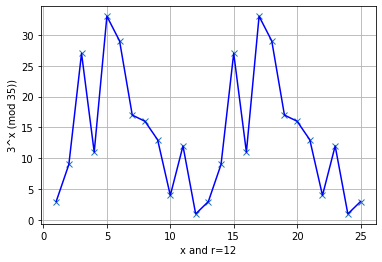

r=12


In [32]:
import matplotlib.pyplot as kuvaaja

# kuvaaja = matplotlib.pyplot

x_lista = []
y_lista = []





x = 1  # start
while x <= 25:  # end
    x_lista.append(x)
    y = modExp(3,x,35)
    y_lista.append(y)

    x = x + 1

# matplotlib.pyplot.grid()
# matplotlib.pyplot.show()
kuvaaja.plot(x_lista, y_lista,"x")
kuvaaja.plot(x_lista, y_lista, color="blue")
kuvaaja.xlabel("x and r=12")
kuvaaja.ylabel("3^x (mod 35))")
kuvaaja.grid()
kuvaaja.show()
print("r=12")

Kvanttilaskennan perusperiaatteisiin voit tutustua esimerkiksi
<a href="https://www.lukemaverkosto.fi/materiaali/johdanto-kvanttilaskentaan/"> 
Johdanto kvanttilaskentaan -artikkelissa</a>.

Käytettyssä kvanttipiirissä $a^r$ esitetään kahdeksan kubitin avulla [4, 5]. Kvanttipiirin tavoittena on etsiä kongruenssia esittävän tilavektorin jakso $r$, jonka jälkeen kongruenssin arvot alkavat toistaa itseään. Kongruenssia kuvaavan tilavektorin ominaistilat löydetään operoimalla tilavektoriin unitaarisella U-portilla,jonka vaikutuksesta kongruenssia kuvaava tilavektori siirtyy seuraavaa jakojäännöstä esittävään tilaan. Vertaa jakojäännösten arvoja yllä olevassa kuvaajassa siihen miten tilavektorin arvot muuttuvat U-portin vaikutuksesta. Kun U-portilla operoidaan  $r$ kertaa on menty koko jakso läpi ja palattu alkutilaan $\mid 1 >$:

$$U\mid y>\ \equiv\ \ \mid a_k\ mod\ N>$$,

$$U\mid1>\ \equiv\ \ \mid3>\$$

$$ U\mid3>\ \equiv\ U^2\mid1>\ \equiv\ \ \mid9>\$$

$$U\mid 9>\ \equiv\ \ \mid27>\$$

Lisäksi kvanttipiirissä tarvitaan qubitti kuvaamaan seuraavan tilavektorin ominaistiloja $U\mid y>\ =\ e^{\ \frac{2pi\cdot s\cdot i}{r}}\mid y>\$. 

Huomaa, että jakso $r$ saadaan määritettyä U-portin ominaisarvon $e^{\ \frac{2pi\cdot s\cdot i}{r}}$  jakajasta. Tutkittavan kvanttisysteemin kongurenssitilojen superpositio voidaan esittää yhtälönä:

$$\mid y>\ =\ \frac{1}{\sqrt{r}}\sum _{k=0}^{r-1}e^{-\frac{2pi\cdot s\cdot i\cdot k}{r}}\mid a^k\ mod\ N>\ $$

Ennen qubitin tilojen mittausta kvanttipiirissä tehdään kannanvaihto fourier-muunnoksen avulla. Alla olevassa piirissä kantaluku $a=7$ ja $N=15$. Tavoitteena on löytää jakolaskun $7^r : 15$ jakso $r$.

In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

In [69]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [70]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [71]:
# Specify variables
n_count = 8  # number of counting qubits
a = 7

In [72]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [73]:
from fractions import Fraction

In [77]:
def qpe_amod15(a):
    n_count = 8
    qc = QuantumCircuit(4+n_count, n_count)
    for q in range(n_count):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(3+n_count) # And auxiliary register in state |1>
    for q in range(n_count): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q), 
                 [q] + [i+n_count for i in range(4)])
    qc.append(qft_dagger(n_count), range(n_count)) # Do inverse-QFT
    qc.measure(range(n_count), range(n_count))
    # Simulate Results
    aer_sim = Aer.get_backend('aer_simulator') #Aer.get_backend('aer_simulator')
    # Setting memory=True below allows us to see a list of each sequential reading
    t_qc = transpile(qc, aer_sim)
    qobj = assemble(t_qc, shots=1)
    result = aer_sim.run(qobj, memory=True).result()
    readings = result.get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**n_count)
    print("Corresponding Phase: %f" % phase)
    return phase

In [78]:
qc.draw(fold=-1)  # -1 means 'do not fold' 

┌───┐                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │                                                                        │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ─────┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      ┌───┐│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ┤ X ├┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3       

In [79]:
phase = qpe_amod15(a) # Phase = s/r
Fraction(phase).limit_denominator(15) # Denominator should (hopefully!) tell us r

Register Reading: 01000000
Corresponding Phase: 0.250000


Fraction(1, 4)

Jakso 0.25 on murtolukuna $1/4$, jossa nimittäjä $r=4$ edustaa jaksoa. Kokeile suorittaa kvanttipiirin konstruointi useamman kerran. Voit myös vaihtaa kantaluvun $a$ arvoa ja katsoa mitä tapahtuu. Verrataan tuloksia, onkon nimittäjä 4 oikea jakso, eli onko $7^4: 15$ jakojäännös 1. Käytetään luvussa 2 määriteltyä modExp(a,k,m)-funktiota.

In [65]:
modExp(7,4,15)

1

Nyt saamme jakajan $N=15$ tulontekijät $a^{r/2}-1$ ja  $a^{r/2}+1$. Funktio gcd(a,b) laskee lukujen suurimman yhteisen tekijän.

In [9]:
# syt(15, 48), pythonissa ** on potenssi
np.gcd(15,7**2-1)

3

In [11]:
#lasketaan syt(15,50)
np.gcd(15,7**2+1)

5

## 4 Tiedon salaaminen RSA-algoritmi

Julkisen avaimen kryptosysteemiin perustuvan RSA-salaus on kehitetty 1970-luvulla. RSA on laajalti käytössä oleva salaus ja se pystytään tekemään niin vahvaksi, että murtaminen vie todella pitkään nykyisillä tietokoneiden laskentateholla. Yksinkertaisuudessaan RSA:n idea on se, että kaksi suurta alkulukua on helppo
kertoa keskenään, mutta alkulukujen tulo on vaikea jakaa tekijöihin. Tämä
tulo voidaan julkistaa ja käyttää kryptausavaimen osana.



### Avainten luontialgoritmi
Oletetaan että Liisa haluaa Pekan lähettävän hänelle salatun viestin.  
Liisa toimii seuraavan algoritmin mukaiseesti luodakseen julkisen avaimen ja yksityisen avaimen:

1. Valitse kaksi suurta alkulukua $p$ ja $q$ satunnaisesti ja toisistaan riippumatta. Laske $N = p q$.

2. Valitse kokonaisluku $1 < e <\phi(N)=(p-1)(q-1)$siten ettei $e$:llä olle yhteisiä tekijöitä $N$:n ja $\phi(N)$:n kanssa. 

3. Valitse $d$ siten, että $d e = 1\ (\mod (p-1)(q-1))$.
Tuhoa kaikki $p$:tä ja $q$:ta koskevat tiedot.


$N$ ja $e$ muodostavat julkisen avaimen ja $N$ sekä $d$ muodostavat yksityisen avaimen. Huomaa, että ainoastaan
$d$ on salainen ja että $N$ on julkisesti saatavilla. Liisa lähettää julkisen avaimen Pekalle ja pitää yksityisen
avaimen salaisena.

### Esimerkkki RSA-algoritmin käytöstä

Pekka lähettää Liisalle RSA-algoritmilla salatun viestin käyttämällä julkista avainta (5, 14). Lähetettävä viesti on kirjain B, joka on aakkosten 2.kirjain. Pekka kryptaa eli salaa viestin B eli luvun 2 seuraavasti:

$$2^5\ \left(mod\ 14\right)\ \equiv32\ \left(mod\ 14\right)\equiv4\ \left(mod\ 14\right)$$

Pekan Liisalle lähetettämä salattu viesti on siis luku 4 tai aakkosten 4.kirjain D.


Liisa on pitänyt salaisena eli omana tietonaan yksityisen avaimensa (11, 14), jonka avulla hän purkkaa Pekalta saamansa viestin eli luvun 4 (kirjaimen D).

$$4^{11}\ \left(mod\ 14\right)\equiv2\ \left(mod\ 14\right)$$

Dekryptattu eli avattu viesti on luku 2, joka vastaa kirjainta B. Yllä oleva kongruenssi on laskettu alla käyttämällä luvussa 2 esiteltyä modExp(b,e,m)-funktiota.


In [7]:
# modular exponentation
# b = base, e = exponent, m = modulo 
def modExp(b, e, m):
    c = 1
    for i in range(e):
        c = c * b % m
    return c

In [8]:
modExp(4,11,14)

2

### Liisan julkisen ja yksityisen avainten muodostaminen

Alla selostetaan, miten Liisa on muodostanut julkisen avaimen ja yksityisen avaimen.

Liisa muodostaa julkisen avaimen (e, N) seuraavasti:
1. Liisa valitsee kaksi satunnaista lukua $p =2$ ja $q = 7$. Nämä luvut voidaan hävittää kun avaimet on muodostettu.

2. Liisa laskee tulon $N=pq=2\cdot7=14$. 

3. Liisa laskee Eulerin phi-funktion $\phi(N)=(p-1)(q-1)$ arvon eli $\phi(14)=(2-1)(7-1)=6$. 
Eulerin funktion arvo 6 ilmaisee sellaisten välillä 1-14 olevien kokonaislukujen lukumäärän, joilla ei ole yhteisiä tekijöitä luvun $N=14$ kanssa. Näitä ovat luvut 1, 3, 5, 9, 11 ja 13.

4. Liisa valitsee yksityisen avaimen eli kokonaisluvun väliltä $1 < e< \phi(N)=6$, eli Liisan valitsee luvuista 2,3,4, 5 sellaisen, jolla ei ole yhteisiä tekijöitä lukujen $N=14$ ja $\phi(N)=6$ kanssa. Ainoa sopiva luku on luku 5. Julkinen avain on siis lukupari <em>(5,14)</em>, joka on vain Liisan tiedossa.


5. Liisa on valinnut yksityisen avaimen (d, N) seuraavasta ehdosta.

$d\cdot e\ \left(mod\ \ \phi\left(N\right)\right)\equiv1$ eli $d\cdot5\ \left(mod\ 6\right)\equiv1$. Ehdon täyttäviä lukuja on paljon, eräs sopiva arvo on d =11, jolloin kongruenssi on muotoa $55\ \left(mod\ 6\right)\equiv1$. Vain viestin vastaanottajan tietämä yksityinen avain on siis <em>(11, 14)</em>. 



### Lähteet

[1 ]Sanoma Pro Lukuteoria ja logiikka

<a href ="https://en.wikipedia.org/wiki/Modular_exponentiation"> [2] Wikipedia: Modular exponentation</a>

<a href ="https://www.coursera.org/lecture/number-theory-cryptography/fast-modular-exponentiation-3syK2"> [3]  Video Examples and algorithms</a>

<a href ="https://qiskit.org/textbook/ch-algorithms/shor.html"> [4] Qiskit Shor's quantum algorithm (Advanced)</a>

<a href ="https://quantum-computing.ibm.com/composer/docs/iqx/guide/shors-algorithm">[5] Qiskit Tutoria 2: Shor's quantum algorithm (Advanced)</a>


[6] https://erepo.uef.fi/bitstream/handle/123456789/16018/urn_nbn_fi_uef-20160037.pdf?sequence=-1&isAllowed=y